<a href="https://www.kaggle.com/code/chandlertimm/manga-colorization-inference?scriptVersionId=96905796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import json
import cv2
import matplotlib
import matplotlib.pyplot as plt
import scipy
import warnings
import shutil
import random
import shutil 

from PIL import Image
from tqdm import tqdm
from pprint import pprint
from distutils.dir_util import copy_tree

# Process the dataset

In [2]:
if not os.path.isdir('./manga_dataset'):
    os.makedirs('./manga_dataset')
    os.makedirs('./manga_dataset/colored/')
    os.makedirs('./manga_dataset/grayscale/')

In [3]:
cl_1 = '../input/unified/blackclover/colored/'
cl_2 = '../input/unified/bukonohero/colored/'
cl_3 = '../input/unified/onepiece/colored/'

target_dir_cl = './manga_dataset/colored/'
    
file_names_cl_1 = os.listdir(cl_1)
file_names_cl_2 = os.listdir(cl_2)
file_names_cl_3 = os.listdir(cl_3)
    
for file_name in tqdm(file_names_cl_1, 'blackclover colored'):
    shutil.copy(os.path.join(cl_1, file_name), target_dir_cl)
    os.rename(os.path.join(target_dir_cl, file_name), os.path.join(target_dir_cl, str('blackclover_cl') + file_name))
    
for file_name in tqdm(file_names_cl_2, 'bukonohero colored'):
    shutil.copy(os.path.join(cl_2, file_name), target_dir_cl)
    os.rename(os.path.join(target_dir_cl, file_name), os.path.join(target_dir_cl, str('bukonohero_cl') + file_name))
    
for file_name in tqdm(file_names_cl_3, 'onepiece colored'):
    shutil.copy(os.path.join(cl_3, file_name), target_dir_cl)
    os.rename(os.path.join(target_dir_cl, file_name), os.path.join(target_dir_cl, str('onepiece_cl') + file_name))

onepiece colored: 100%|██████████| 1461/1461 [00:14<00:00, 100.75it/s]


In [4]:
bw_1 = '../input/unified/blackclover/grayscale/'
bw_2 = '../input/unified/bukonohero/grayscale/'
bw_3 = '../input/unified/onepiece/grayscale/'

target_dir_bw = './manga_dataset/grayscale/'

file_names_bw_1 = os.listdir(bw_1)
file_names_bw_2 = os.listdir(bw_2)
file_names_bw_3 = os.listdir(bw_3)

for file_name in tqdm(file_names_bw_1, 'blackclover grayscale'):
    shutil.copy(os.path.join(bw_1, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('blackclover_bw') + file_name))
    
for file_name in tqdm(file_names_bw_2, 'bukonohero grayscale'):
    shutil.copy(os.path.join(bw_2, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('bukonohero_bw') + file_name))
    
for file_name in tqdm(file_names_bw_3, 'onepiece grayscale'):
    shutil.copy(os.path.join(bw_3, file_name), target_dir_bw)
    os.rename(os.path.join(target_dir_bw, file_name), os.path.join(target_dir_bw, str('onepiece_bw') + file_name))

onepiece grayscale: 100%|██████████| 2679/2679 [00:34<00:00, 76.65it/s]


In [5]:
print(len(os.listdir('./manga_dataset/colored/')))
print(len(os.listdir('./manga_dataset/grayscale/')))

3577
4841


In [6]:
# colored
colored_files =  os.listdir('./manga_dataset/colored/')

# grayscale
grayscale_files =  os.listdir('./manga_dataset/grayscale/')
grayscale_files = grayscale_files[:3577]

In [7]:
# shuffle the dataset
temp = list(zip(colored_files, grayscale_files))

random.shuffle(temp)
res1, res2 = zip(*temp)

# res1 and res2 come out as tuples, and so must be converted to lists.
colored, grayscale = list(res1), list(res2)

print(colored[0:5])
print(grayscale[0:5])

['onepiece_cl1192.png', 'onepiece_cl306.png', 'bukonohero_cl300.png', 'bukonohero_cl513.png', 'onepiece_cl1356.png']
['onepiece_bw979.png', 'onepiece_bw1351.png', 'onepiece_bw1166.png', 'bukonohero_bw506.png', 'onepiece_bw2263.png']


In [8]:
#split the dataset 0.8 for training

#training colored
train_cl = []
for i in tqdm(range(int(0.0*len(colored)), int(0.8*len(colored)))):
    train_cl.append(colored[i])
    
#testing grayscale
test_cl = []
for i in tqdm(range(int(0.8*len(colored)), int(1.0*len(colored)))):
    test_cl.append(colored[i])

100%|██████████| 716/716 [00:00<00:00, 413653.12it/s]


In [9]:
print(train_cl[-3:None])
print(test_cl[0:3])

['onepiece_cl1014.png', 'blackclover_cl663.png', 'bukonohero_cl42.png']
['onepiece_cl377.png', 'blackclover_cl707.png', 'blackclover_cl6.png']


In [10]:
#training grayscale
train_bw = []
for i in tqdm(range(int(0.0*len(grayscale)), int(0.8*len(grayscale)))):
    train_bw.append(grayscale[i])
    
#testing grayscale
test_bw = []
for i in tqdm(range(int(0.8*len(grayscale)), int(1.0*len(grayscale)))):
    test_bw.append(grayscale[i])

100%|██████████| 716/716 [00:00<00:00, 364235.50it/s]


In [11]:
print(train_bw[-3:None])
print(test_bw[0:3])

['onepiece_bw717.png', 'blackclover_bw633.png', 'onepiece_bw2453.png']
['blackclover_bw12.png', 'blackclover_bw384.png', 'onepiece_bw201.png']


In [12]:
# create the dataset folders
if not os.path.isdir('./train_test'):
    os.makedirs('./train_test')
    # unpaired image dataset path
    os.makedirs('./train_test/trainA/')
    os.makedirs('./train_test/trainB/')
    os.makedirs('./train_test/testA/')
    os.makedirs('./train_test/testB/')

In [13]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [14]:
# copy the train dataset to unpaired image dataset path
for i in tqdm(range(len(train_cl)), 'copying train colored and grayscale'):
    # Source path 
    src1 = find(str(train_bw[i]), './manga_dataset/grayscale/')
    src2 = find(str(train_cl[i]), './manga_dataset/colored/')

    # Destination path 
    dest1 = './train_test/trainA/'
    dest2 = './train_test/trainB/'

    # Copy the content of source to destination 
    shutil.copy(src1, dest1) 
    shutil.copy(src2, dest2)  

copying train colored and grayscale: 100%|██████████| 2861/2861 [01:03<00:00, 44.94it/s]


In [15]:
# copy the test dataset to unpaired image dataset path
for i in tqdm(range(len(test_cl)), 'copying test colored and grayscale'):
    # Source path 
    src1 = find(str(test_bw[i]), './manga_dataset/grayscale/')
    src2 = find(str(test_cl[i]), './manga_dataset/colored/')

    # Destination path 
    dest1 = './train_test/testA/'
    dest2 = './train_test/testB/'

    # Copy the content of source to destination 
    shutil.copy(src1, dest1) 
    shutil.copy(src2, dest2) 

copying test colored and grayscale: 100%|██████████| 716/716 [00:19<00:00, 36.00it/s]


# Install MMGeneration

In [16]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 619 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3


In [17]:
!conda install pytorch==1.6.0 torchvision==0.7.0 cudatoolkit=10.1 -c pytorch -y

# install the latest mmcv
# pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html

# install mmgeneration
!rm -rf mmgeneration
!git clone https://github.com/open-mmlab/mmgeneration.git
%cd mmgeneration
!pip install -r requirements.txt
!pip install -v -e .

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cudatoolkit=10.1
    - pytorch==1.6.0
    - torchvision==0.7.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda

In [18]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'linux',
 'Python': '3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla P100-PCIE-16GB',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 10.1, V10.1.24',
 'GCC': 'gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'PyTorch': '1.6.0',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v1.5.0 (Git Hash e2ac1fac44c5078ca927cb9b90e1b3066a0b2ed0)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 10.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;

In [19]:
# Check MMDetection installation
import mmgen
print(mmgen.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

0.7.1
10.1
GCC 7.3


# Start Inference

In [20]:
%%writefile configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py

_base_ = [
    '../_base_/models/cyclegan/cyclegan_lsgan_resnet.py',
    '../_base_/datasets/unpaired_imgs_256x256.py',
    '../_base_/default_runtime.py'
]

domain_a = 'grayscale'
domain_b = 'colored'
model = dict(
    default_domain=domain_b,
    reachable_domains=[domain_a, domain_b],
    related_domains=[domain_a, domain_b],
    gen_auxiliary_loss=[
        dict(
            type='L1Loss',
            loss_weight=10.0,
            loss_name='cycle_loss',
            data_info=dict(
                pred=f'cycle_{domain_a}', target=f'real_{domain_a}'),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=10.0,
            loss_name='cycle_loss',
            data_info=dict(
                pred=f'cycle_{domain_b}',
                target=f'real_{domain_b}',
            ),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=0.5,
            loss_name='id_loss',
            data_info=dict(
                pred=f'identity_{domain_a}', target=f'real_{domain_a}'),
            reduction='mean'),
        dict(
            type='L1Loss',
            loss_weight=0.5,
            loss_name='id_loss',
            data_info=dict(
                pred=f'identity_{domain_b}', target=f'real_{domain_b}'),
            reduction='mean')
    ])
dataroot = '.././train_test/'
train_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_a}',
        flag='color'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_b}',
        flag='color'),
    dict(
        type='Resize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        scale=(256, 368),
        interpolation='bicubic'),
    dict(
        type='Crop',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        crop_size=(368, 256),
        random_crop=True),
    dict(type='Flip', keys=[f'img_{domain_a}'], direction='horizontal'),
    dict(type='Flip', keys=[f'img_{domain_b}'], direction='horizontal'),
    dict(type='RescaleToZeroOne', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Normalize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        to_rgb=False,
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]),
    dict(type='ImageToTensor', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Collect',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        meta_keys=[f'img_{domain_a}_path', f'img_{domain_b}_path'])
]

test_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_a}',
        flag='color'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key=f'img_{domain_b}',
        flag='color'),
    dict(
        type='Resize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        scale=(256, 368),
        interpolation='bicubic'),
    dict(type='RescaleToZeroOne', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Normalize',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        to_rgb=False,
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]),
    dict(type='ImageToTensor', keys=[f'img_{domain_a}', f'img_{domain_b}']),
    dict(
        type='Collect',
        keys=[f'img_{domain_a}', f'img_{domain_b}'],
        meta_keys=[f'img_{domain_a}_path', f'img_{domain_b}_path'])
]

data = dict(
    train=dict(
        dataroot=dataroot,
        pipeline=train_pipeline,
        domain_a=domain_a,
        domain_b=domain_b),
    val=dict(
        dataroot=dataroot,
        domain_a=domain_a,
        domain_b=domain_b,
        pipeline=test_pipeline),
    test=dict(
        dataroot=dataroot,
        domain_a=domain_a,
        domain_b=domain_b,
        pipeline=test_pipeline))

optimizer = dict(
    generators=dict(type='Adam', lr=0.0002, betas=(0.5, 0.999)),
    discriminators=dict(type='Adam', lr=0.0002, betas=(0.5, 0.999)))

# learning policy
lr_config = dict(
    policy='Linear', by_epoch=False, target_lr=0, start=125000, interval=1250)

checkpoint_config = dict(interval=5000, save_optimizer=True, by_epoch=False)
custom_hooks = [
    dict(
        type='MMGenVisualizationHook',
        output_dir='training_samples',
        res_name_list=[f'fake_{domain_a}', f'fake_{domain_b}'],
        interval=5000)
]

runner = None
use_ddp_wrapper = True
total_iters = 250000
# load_from = '../cyclegan_lsgan_resnet_in_1x1_246200_summer2winter_convert-bgr_20210902_165932-fcf08dc1.pth'
# resume_from = './work_dirs/cyclegan_bw2cl/ckpt/cyclegan_bw2cl/iter_55000.pth'
workflow = [('train', 1)]
# exp_name = 'cyclegan_bw2cl'
work_dir = '../../input/manga-colorization-output'
# testA: 716, testB:716
num_images = 716
metrics = dict(
    FID=dict(type='FID', num_images=num_images, image_shape=(3, 368, 256)),
    IS=dict(
        type='IS',
        num_images=num_images,
        image_shape=(3, 368, 256),
        inception_args=dict(type='pytorch')))

evaluation = dict(
    type='TranslationEvalHook',
    target_domain=domain_b,
    interval=5000,
    metrics=[
        dict(type='FID', num_images=num_images, bgr2rgb=True),
        dict(
            type='IS',
            num_images=num_images,
            inception_args=dict(type='pytorch'))
    ],
    best_metric=['fid', 'is'])

Overwriting configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py


In [21]:
!rm -rf prettytable
!pip install -U git+https://github.com/jazzband/prettytable

  Cloning https://github.com/jazzband/prettytable to /tmp/pip-req-build-wignbu6q
  Running command git clone --filter=blob:none --quiet https://github.com/jazzband/prettytable /tmp/pip-req-build-wignbu6q
  Resolved https://github.com/jazzband/prettytable to commit 01e8eb29c460b6fc4826f774e1ec071a2871f51c
  Preparing metadata (setup.py) ... - done
  Created wheel for prettytable: filename=prettytable-3.3.1.dev5-py3-none-any.whl size=27153 sha256=3d986e4f4f4294cfbc78d8442be5bed237ecf53a5d685585bb4f498b26ee2557
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wt25f9m/wheels/3a/d4/46/a30867a08bd7fd69202d67a5852b18f0f6e505d9e7264fb3c5
Successfully built prettytable
  Attempting uninstall: prettytable
    Found existing installation: prettytable 0.7.2
    Uninstalling prettytable-0.7.2:
      Successfully uninstalled prettytable-0.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following de

In [22]:
# !python tools/utils/translation_eval.py configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py ../../input/manga-colorization-output/ckpt/cyclegan_bw2cl/iter_250000.pth --samples-path ../../input/manga-colorization-output/training_samples/

# Demo

In [23]:
if not os.path.isdir('.././graysacle4test'):
    os.makedirs('.././graysacle4test')

In [24]:
from PIL import Image
import os, sys

path = ".././train_test/testA/"
dirs = os.listdir( path )

def resize():
    for item in tqdm(dirs, 'resizing images'):
        if os.path.isfile(path+item):
            im = Image.open(path+item)
#             f, e = os.path.splitext(path+item)
            imResize = im.resize((256,328), Image.ANTIALIAS)
            imResize.save('.././graysacle4test/' + item)

resize()

resizing images: 100%|██████████| 716/716 [00:51<00:00, 14.02it/s]


In [25]:
demo_imgs = os.listdir('.././graysacle4test/')
pprint(demo_imgs[0:10])

['bukonohero_bw680.png',
 'bukonohero_bw55.png',
 'onepiece_bw886.png',
 'onepiece_bw470.png',
 'onepiece_bw1434.png',
 'onepiece_bw412.png',
 'onepiece_bw2591.png',
 'onepiece_bw1549.png',
 'blackclover_bw682.png',
 'blackclover_bw261.png']


/opt/conda/lib/python3.7/site-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


load checkpoint from local path: ../../input/manga-colorization-output/ckpt/cyclegan_bw2cl/iter_250000.pth


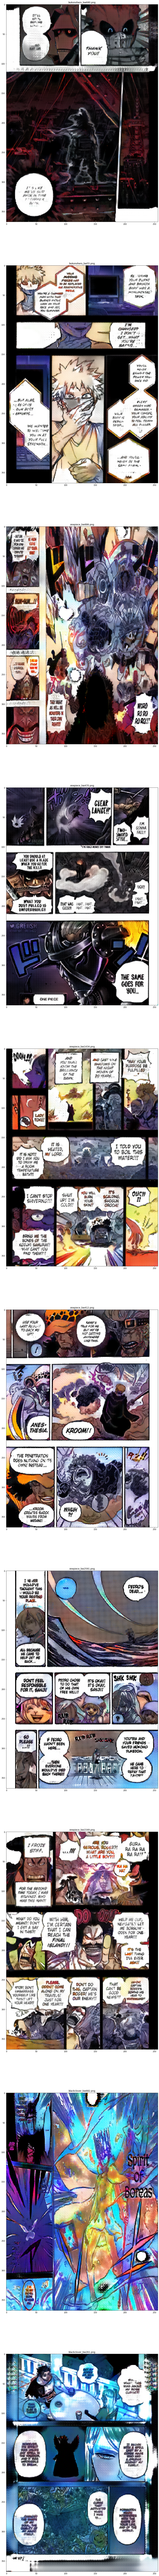

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import mmcv
from mmgen.apis import init_model, sample_img2img_model

# Specify the path to model config and checkpoint file
config_file = 'configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py'
checkpoint_file = '../../input/manga-colorization-output/ckpt/cyclegan_bw2cl/iter_250000.pth'
device = 'cuda:0'
model = init_model(config_file, checkpoint_file, device=device)

num_plot = 10  #number of images you want to plot
fig = plt.figure(figsize=(250,250))

for i in range(num_plot):
    image_path = '.././graysacle4test/' + str(demo_imgs[i])
#     print(demo_imgs[i])
    translated_image = sample_img2img_model(model, image_path, target_domain='colored')
    new_image = (translated_image[0, [2, 1, 0]].permute(1, 2, 0) + 1) / 2 * 255
    
    fig.add_subplot(num_plot, 1, i+1)
    plt.title(str(demo_imgs[i]))
    plt.imshow(new_image.byte())
    
plt.show()

In [27]:
# #save the demo in a folder
# !python demo/translation_demo.py configs/cyclegan/cyclegan_lsgan_id0_resnet_in_summer2winter_b1x1_250k.py work_dirs/cyclegan_blackclover/ckpt/cyclegan_blackclover/iter_250000.pth ../blackclover/testA/ --target-domain colored --save-path work_dirs/demos/